![image.png](http://risovach.ru/upload/2014/01/mem/begite-glupcy_39720312_orig_.jpeg)

### Используемые ссылки:
https://habr.com/ru/company/skillfactory/blog/664756/

In [249]:
#!pip install matplotlib
#!pip install windrose openpyxl
#!pip install ipympl
#!pip install scipy
#!pip install --upgrade pip
#!pip install seaborn

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi, sqrt
import seaborn
import random
from scipy import stats
from scipy.stats import pearsonr
# %matplotlib widget

In [29]:
from windrose import WindroseAxes

### Считывание данных из файла


### Что делаль
Во время анализа, я выделил несколько столбцов, которые мог бы убрать из глобальной выборке. Например столбец ff10 содержит 100 значений из 3000 строк.

In [5]:
Weather_csv = pd.read_csv('LR1/WV_test.csv', delimiter=',')

In [6]:
Weather_csv

,Date,T,Po,P,Pa,U,DD,Ff,N,WW,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2021 21:00,-5.7,738.1,754.5,-2.1,93,S,3,100%.,Снег непрерывный слабый в срок наблюдения.,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,-6.7,NaN,NaN,NaN,NaN,NaN,NaN
1,31.12.2021 18:00,-6.3,740.2,756.5,-1.2,93,S,2,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.0,-7.3,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.12.2021 15:00,-6.8,741.4,757.9,-1.5,92,S,1,100%.,Морось (незамерзающая) или снежные зерна нелив...,...,NaN,NaN,2.0,-7.9,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2021 12:00,-7.4,742.9,759.5,-1.2,91,S,1,100%.,Морось замерзающая слабая. Диаметр смешанного...,...,NaN,NaN,4.0,-8.6,NaN,NaN,NaN,NaN,NaN,NaN
4,31.12.2021 09:00,-8.3,744.1,760.7,-0.7,90,S,1,100%.,Дымка.,...,NaN,NaN,4.0,-9.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,01.01.2021 12:00,-1.6,749.3,765.6,-0.2,96,SSE,3,100%.,Дымка.,...,NaN,NaN,4.0,-2.2,NaN,NaN,NaN,NaN,NaN,NaN
2914,01.01.2021 09:00,-1.9,749.5,765.8,0.1,96,S,2,100%.,Дымка.,...,NaN,NaN,2.0,-2.4,NaN,NaN,NaN,NaN,NaN,NaN
2915,01.01.2021 06:00,-1.9,749.4,765.7,-0.4,96,S,3,100%.,Дымка.,...,NaN,NaN,2.0,-2.4,Осадков нет,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,7
2916,01.01.2021 03:00,-2.4,749.8,766.1,-0.3,96,SSE,2,100%.,Дымка.,...,NaN,NaN,2.0,-2.9,NaN,NaN,NaN,NaN,NaN,NaN


# 3 пункт лабораторной работы
## Построение розы ветров
1. Создал резеврный файл с данными, в котором изменил надписи в столбце DD на международный формат 
2. Дальше смотрел разные источники с описанием построения розы ветров

In [7]:
df_test = pd.read_csv("LR1/WV_test.csv", delimiter = ',', usecols = ["DD", "Ff"])
Ff_list = df_test["DD"].tolist()
degrees = []
for i in Ff_list:
    if i == "N":
        degrees.append(0)
    elif i == "NNE":
        degrees.append(22.5)
    elif i == "NE":
        degrees.append(45)
    elif i == "ENE":
        degrees.append(67.5)
    elif i == "E":
        degrees.append(90)
    elif i == "ESE":
        degrees.append(112.5)
    elif i == "SE":
        degrees.append(135)
    elif i == "SSE":
        degrees.append(157.5)
    elif i == "S":
        degrees.append(180)
    elif i == "SSW":
        degrees.append(202.5)
    elif i == "SW":
        degrees.append(225)
    elif i == "WSW":
        degrees.append(247.5)
    elif i == "W":
        degrees.append(270)
    elif i == "WNW":
        degrees.append(292.5)
    elif i == "NW":
        degrees.append(315)
    else:
        degrees.append(337.5)

df_test["Dir"] = degrees
df_test

,DD,Ff,Dir
0,S,3,180.0
1,S,2,180.0
2,S,1,180.0
3,S,1,180.0
4,S,1,180.0
...,...,...,...
2913,SSE,3,157.5
2914,S,2,180.0
2915,S,3,180.0
2916,SSE,2,157.5


## Проверка корреляции данных


<AxesSubplot:xlabel='x', ylabel='y'>

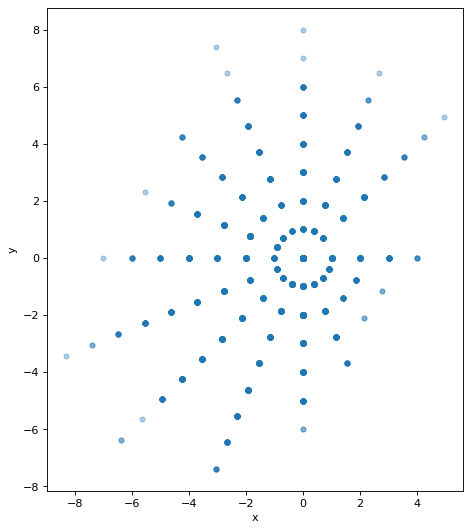

In [189]:
df_test['x'] = df_test['Ff'] * np.sin(df_test['Dir'] * pi / 180.0)
df_test['y'] = df_test['Ff'] * np.cos(df_test['Dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi = 80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
df_test.plot(kind='scatter', x = 'x', y = 'y', alpha = 0.35, ax = ax)

## Построение розы ветров в разных режимах

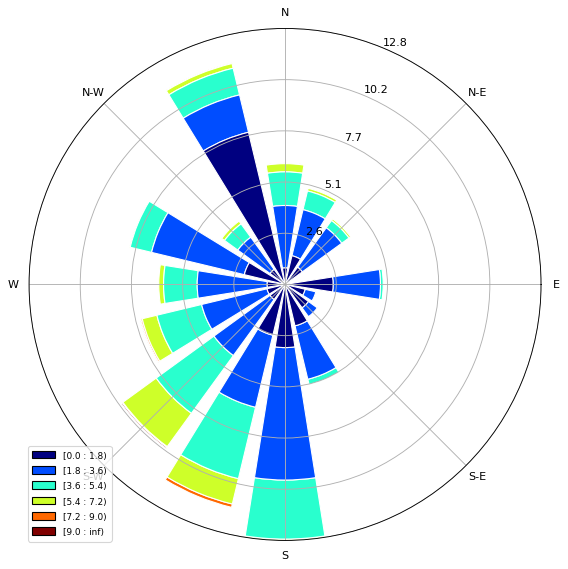

In [190]:
ax = WindroseAxes.from_ax()
ax.bar(df_test.Dir, df_test.Ff, normed=True, opening=0.8, edgecolor = 'white')
ax.set_legend()

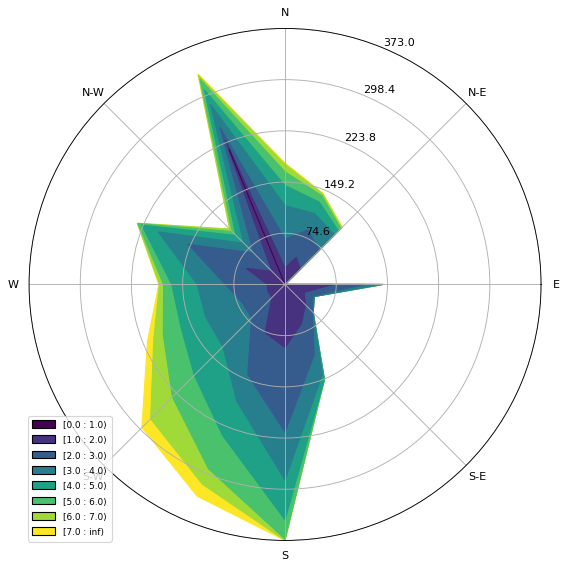

In [15]:
ax = WindroseAxes.from_ax()
ax.contourf(df_test.Dir, df_test.Ff, bins=np.arange(0, 8, 1), cmap = cm.viridis)
ax.set_legend()

# 4 пункт лабораторной работы:
Выбранный параметр - T (Температура воздуха)
1. максимальное, минимальное значения;
2. среднее значение;
3. медиану;
4. стандартное отклонение;
5. дисперсию;
6. моду;
7. 10 и 90 перцентиль;
8. 1, 2, 3 квартили

In [9]:
dft = pd.read_csv('LR1/WV_test.csv', delimiter=',', usecols = ["T"]) # Выбираем параметр

#### Вычисление максимального и минимального значений

In [10]:
dft.max()

T    35.0
dtype: float64

In [8]:
dft.min()

T   -30.4
dtype: float64

#### Вычисление среднего значения
Порядок вычисления:
1. Суммируем все элементы списка
2. Делим полученное значение на кол-во элементов

In [10]:
temp_list = dft.values.tolist()
all_temp = 0
for temp in temp_list:
    all_temp += temp[0]
res = all_temp / len(temp_list)
round(res, 6)

5.276525

In [11]:
dft.mean()

T    5.276525
dtype: float64

#### Вычиcление медианы
Порядок выполнения:
1. Отсортируем список
2. Найдём серединный элемент

In [10]:
med_temp_list = temp_list.copy()
med_temp_list.sort()
med_temp_list[int(len(med_temp_list)/2)]

[5.5]

In [16]:
dft.median()

T    5.5
dtype: float64

#### Вычисление дисперсии

Для вычисления дисперсии нам надо использовать формулу:
$$ \sigma^2 = \frac{\sum(x-\bar{x})^2} {n-1}  $$

In [17]:
high_sum = 0
for temp in temp_list:
    prom = (round(temp[0], 1) - res) ** 2
    high_sum += prom
variance = high_sum/ (len(temp_list) -1)
round(variance, 6)

165.427879

In [18]:
dft.var()

T    165.427879
dtype: float64

#### Вычисление стандартного отклонения
Для вычисления с.о. необходимо вычислить корень дисперсии

$$ \sigma = \sqrt{\sigma^2} $$

In [19]:
round(variance ** 0.5, 6)

12.861877

In [20]:
dft.std()

T    12.861877
dtype: float64

#### Вычисление моды
Для вычсиления моды нам понадобится:
1. Посчитать кол-во повторений элемента в списке
2. Найти наиболее повторяющееся значение


In [11]:
counts = {}
for temp in temp_list:
    if temp[0] not in counts:
        counts[round(temp[0], 1)] = 1
    else:
        counts[round(temp[0], 1)] += 1

maxim = 0
mode_temp = None
for k, v in counts.items():
    if maxim < v:
        maxim = v
        mode_temp = k

print(mode_temp, maxim)

1.2 17


In [12]:
dft.value_counts()

T    
 0.6     17
 1.2     17
 8.3     17
-1.5     16
-2.9     15
         ..
-17.5     1
-17.8     1
-18.2     1
-19.0     1
 35.0     1
Length: 561, dtype: int64

#### 10 и 90 перцентили
Перцентиль/квантиль вычисляется ручками следующим образом:
1. Отсортируем список в возрастающем порядке
2. Рассчитаем i, интересующего нас перцентиля/квантиля

$$ i = (\frac{p} {100}) * (n+1) $$, 
где n - число значений, p - перцентиль

In [13]:
n = len(med_temp_list)
p = int(input("Введите перцентиль/квантиль: "))
i = (p/100) * (n+1)
med_temp_list[int(i)]

Введите перцентиль/квантиль:  25


[-2.6]

In [25]:
dft.quantile(q = [0.1, 0.9], axis = 0, numeric_only = True)

,T
0.1,-13.6
0.9,21.7


#### Квантили

In [14]:
dft.quantile(q = [0.25, 0.5, 0.75], axis = 0, numeric_only = True)

,T
0.25,-2.6
0.50,5.5
0.75,15.2


#### Все вместе

In [53]:
dft.describe().round(2)

,T
count,2918.00
mean,5.28
std,12.86
min,-30.40
25%,-2.60
50%,5.50
75%,15.20
max,35.00


In [ ]:
# Индексы строк 
Po_dict = {"January": [2670, 2917],"February": [2447, 2670], "March": [2199, 2447], "April": [1959, 2199], "May": [1711, 1959],
           "June": [1471, 1711], "July": [1223, 1471],"August": [975, 1223], "September": [736, 975],"October": [488, 736], "November": [248, 488], "December": [0,248]}

Po_dict_num = {"1": [2670, 2917],"2": [2447, 2670], "3": [2199, 2447], "4": [1959, 2199], "5": [1711, 1959], "6": [1471, 1711],
           "7": [1223, 1471],"8": [975, 1223], "9": [736, 975],"10": [488, 736], "11": [248, 488], "12": [0,248]} 


month = str(input("Введите номер месяца: "))

dfpo.iloc(Po_dict_num[month][1])

# 5 пункт
### Построение гистограммы
Для построения гистрограммы, я беру максимальные значения за каждый день выбранного месяца 

In [14]:
import matplotlib as mpl
from calendar import monthrange

In [15]:
dfdh = pd.read_csv('LR1/WV_test.csv', delimiter=',', usecols = ["Date", "U"], parse_dates = ["Date"])

In [16]:
dfdh.set_index("Date", inplace=True)

In [17]:
max_Po = []
#print(type(name))
jan = dfdh['U'].resample('D').max()

number_day = 1
year = 2021
month = int(input("Введите номер месяца для выборки: ")) # Ввод месяца по которому надо сделать выборку

days = monthrange(year, month)[1]
while len(max_Po) != days:
    Element = jan[f"{year}-{month}-{number_day}"].round()
    max_Po.append(int(Element))
    number_day += 1

# max_Po

Введите номер месяца для выборки:  8


In [18]:
dict_max_Po = {}
for i in max_Po:
    if i in dict_max_Po:
        continue
    else:
        dict_max_Po[i] = max_Po.count(i)
# dict_max_Po

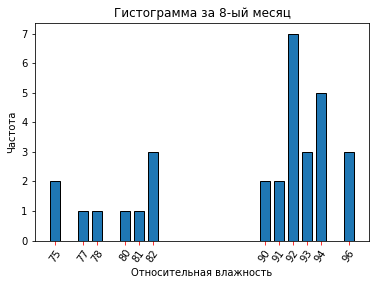

In [19]:
width = 0.75

fix, ax = plt.subplots()
ax.set_ylabel("Частота")
ax.set_xlabel("Относительная влажность")

x = list(dict_max_Po)
y = list(dict_max_Po.values())
ax.bar(x, y, width, edgecolor="black", linewidth=1)
ax.tick_params(axis="x", labelrotation = 55, color="r", labelcolor= 'black')
plt.xticks(x, np.round(x,2))
#ax.set_box_aspect()

plt.title(f"Гистограмма за {month}-ый месяц")
plt.show()

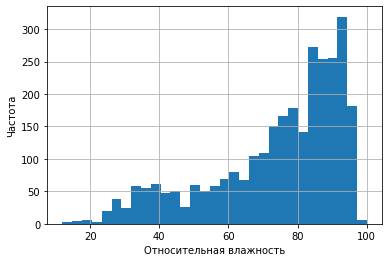

In [20]:
# Общая информация, а не за определенный месяц
dfdh["U"].hist(bins = days)
plt.xlabel("Относительная влажность")
plt.ylabel("Частота")
plt.show()

In [21]:
dfdh["U"].skew()

-0.9914150694997008

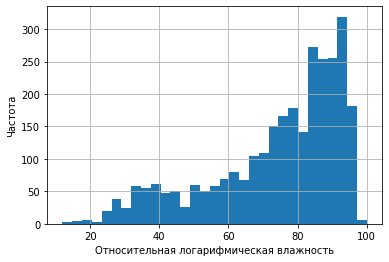

In [22]:
dfdh["U"].hist(bins = days)
plt.xlabel("Относительная логарифмическая влажность")
plt.ylabel("Частота")
plt.show()

In [23]:
dfdh["U"].apply(np.log).skew()

-1.6483770065593641

# 6 Пункт
1. Определим наличие корреляции между двумя переменными.
2. Построим график температуры относительно атмосферного давления на уровне станции


In [25]:
df = pd.read_csv('LR1/WV_test.csv', delimiter=',')
# df

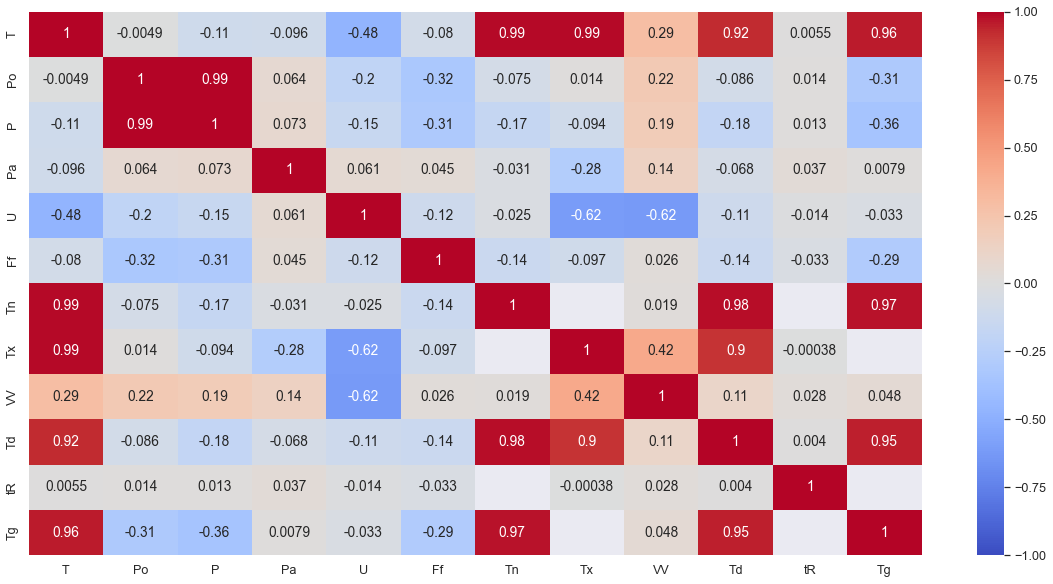

In [26]:
seaborn.set(font_scale=1.15)
plt.figure(figsize=(20,10))
seaborn.heatmap(
    df.corr(),        
    cmap='coolwarm', # цветовая схема
    annot=True, # Отображение значений внутри ячеек
    vmin=-1, vmax=1); # Отображение значений от минимальной границе к максимальной

In [36]:
r,p = pearsonr(df["T"], df["Po"])
r.round(4), p.round(4)

(-0.0049, 0.7919)

#### Вычисление коэффициента корреляции для данных температуры и давления следующим образом:

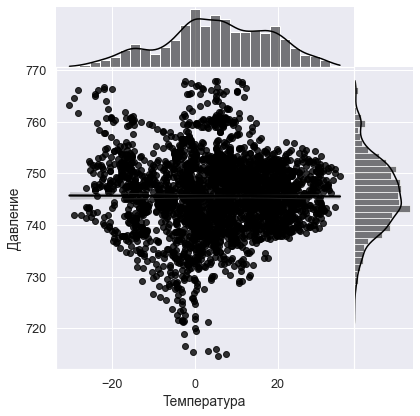

In [53]:
xs = df["T"]
ys = df["Po"]

seaborn.jointplot(x = xs, y = ys, data=df, space = 0, kind='reg', color = "black");
# подпишем оси координат
plt.xlabel("Температура");
plt.ylabel("Давление");
plt.show();

In [38]:
df["T"].corr(df["Po"]).round(4)

-0.0049

#### Вычисление коэффициента корреляции для данных температуры и логарифма давления следующим образом

In [39]:
def jitter(limit):
    return lambda x: random.uniform(-limit, limit) + x

Так как значения округлялись, то могут быть погрешности. Поэтому создадим случайное искажение в диапазоне между -0.5 и 0.5

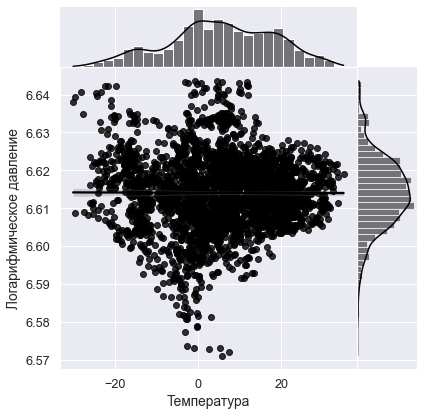

In [40]:
xs_j = df["T"].apply(jitter(0.5))
ys_j = df['Po'].apply(jitter(0.5)).apply(np.log)

seaborn.jointplot(x = xs_j, y = ys_j, data=df, space = 0, kind='reg', color = "black");
# подпишем оси координат
plt.xlabel("Температура");
plt.ylabel("Логарифмическое давление");
plt.show();

In [41]:
df["T"].corr(np.log(df["Po"])).round(4)

-0.0033

## Подсчет коэффициента корреляции ручками

In [42]:
chisl = 0
znam = 0
znam_x = 0
znam_y = 0

mid_xs = df["T"].sum() / len(df["T"])
mid_ys = df["Po"].sum() / len(df["Po"])


for i in range(len(df["T"])):
    chisl += (df["T"][i].round(2) - mid_xs.round(2)) * (df["Po"][i].round(2) - mid_ys.round(2))
    znam_x += (df["T"][i].round(2) - mid_xs) ** 2
    znam_y += (df["Po"][i].round(2) - mid_ys) ** 2
    znam = sqrt(znam_x * znam_y)

coef_kor = chisl.round(2) / znam
coef_kor.round(4)

-0.0049

# 7 Пункт
TODO: Рассчитать доверительный интервал для генерального среднего.

In [43]:
def t_statistic(xs, ys):
    '''Вычисление t-статистики'''
    r = xs.corr(ys)  # как вариант, correlation(xs, ys)
    df_N = xs.count() - 1
    return r * np.sqrt(df_N / 1 - r ** 2)

In [44]:
xs = df['T']
ys = df['Po'].apply(np.log)
t_value = t_statistic(xs, ys)
df_N = xs.count() - 1
p = stats.t.sf(abs(t_value), df_N) # Нахождение p-значения
print({'t-значение':t_value.round(6), 'p-значение':p.round(6)})

{'t-значение': -0.177453, 'p-значение': 0.429583}


In [45]:
xs.mean()

5.276525017135024

In [46]:
xs.var()

165.42787862998756

In [47]:
alpha = 0.95
stats.t.interval(alpha, df=len(xs)-1, loc=np.mean(xs), scale=stats.sem(xs)) 

(4.809661392450519, 5.7433886418195295)

In [48]:
alpha = 0.99
stats.t.interval(alpha, df=len(xs)-1, loc = np.mean(xs), scale = stats.sem(xs))

(4.6628152337704005, 5.890234800499648)